In [14]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
iris = load_iris()

In [16]:
iris.keys()

dict_keys(['DESCR', 'feature_names', 'target_names', 'target', 'data'])

In [17]:
print(np.shape(iris['data']))

(150, 4)


In [18]:
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [19]:
X = iris['data'][:,[0,1]] #seleccionamos solamente dos de las caracteristicas
Y = iris.target

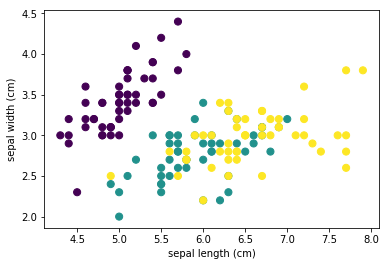

In [20]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50.0)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

In [21]:
dec_tree = DecisionTreeClassifier(min_samples_split=10)
tree_result = dec_tree.fit(iris.data, iris.target)

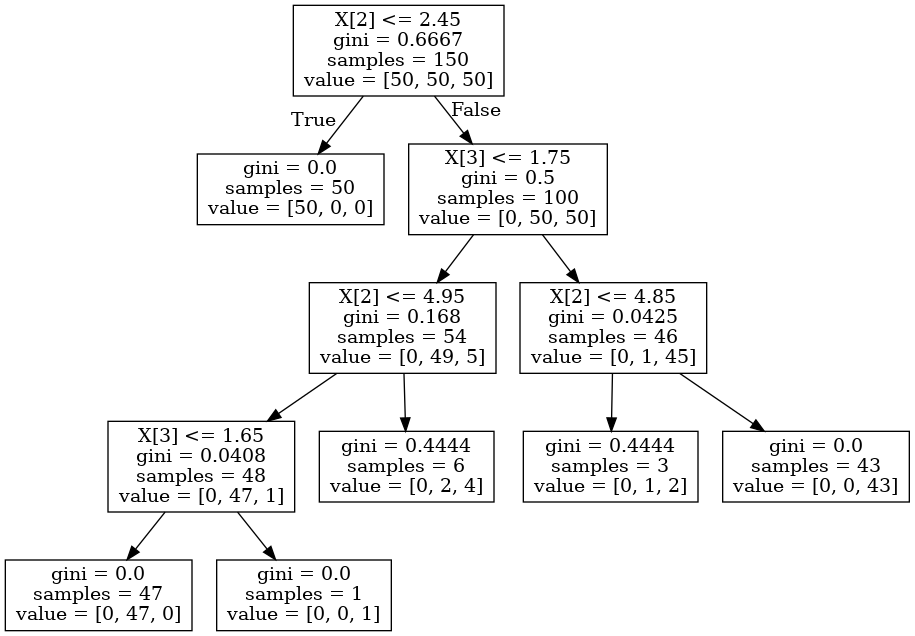

In [23]:
import pydot 
from sklearn.externals.six import StringIO  

dot_data = StringIO() 
export_graphviz(tree_result, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
a = graph[0].write_png("iris.png") 

from IPython.display import Image  
Image('iris.png')

In [12]:
dec_tree = DecisionTreeClassifier(min_samples_split=10, max_depth=3)
tree_result = dec_tree.fit(iris.data, iris.target)

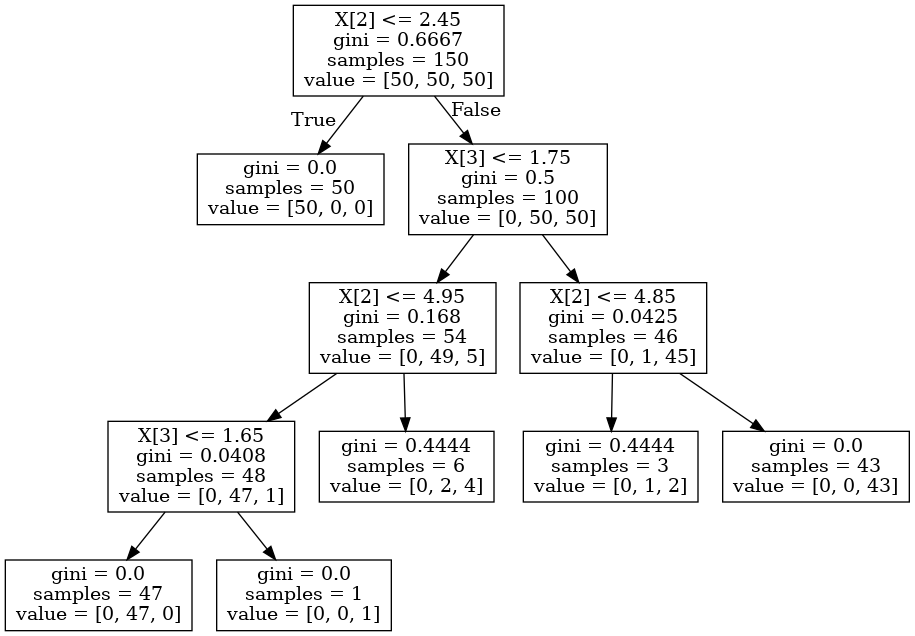

In [24]:
dot_data = StringIO() 
export_graphviz(tree_result, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
a = graph[0].write_png("iris.png") 
Image('iris.png')

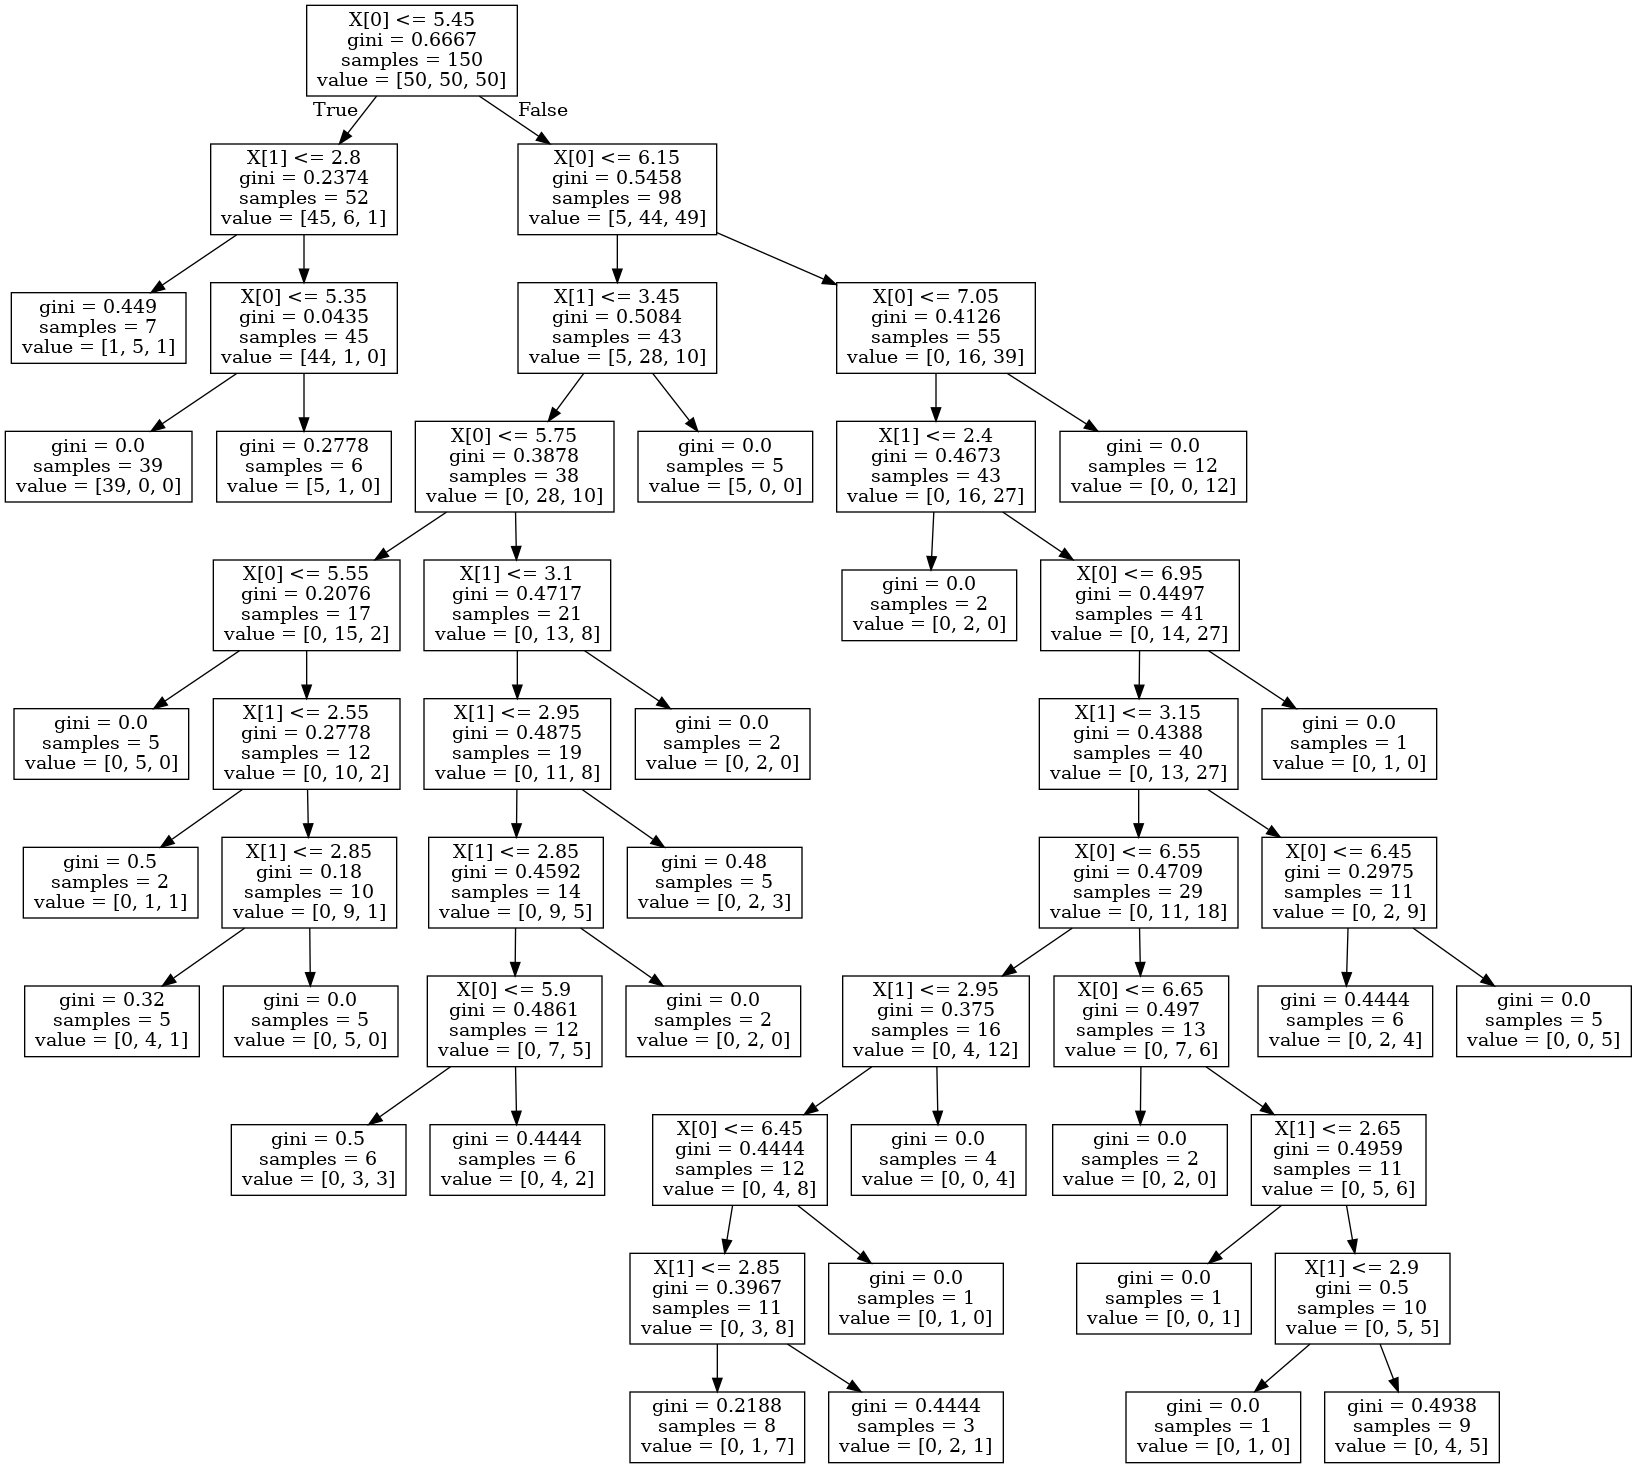

In [25]:
pair  = [0,1]
X = iris['data'][:,pair] #seleccionamos solamente dos de las caracteristicas
Y = iris.target

dec_tree = DecisionTreeClassifier(min_samples_split=10)
tree_result = dec_tree.fit(X, Y)


dot_data = StringIO() 
export_graphviz(tree_result, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
a = graph[0].write_png("iris.png") 
Image('iris.png')

In [26]:
plot_step = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

In [27]:
Z = tree_result.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

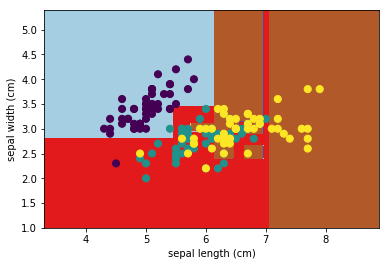

In [28]:
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0], X[:,1], c=Y, s=50.0)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])